In [44]:
from astropy.io import fits
import treecorr

# Change these lines
dir_psfcat = '/lcrc/project/SPT3G/users/ac.yomori/scratch/psf_y3a1-v29.fits'
dir_output = '/lcrc/project/SPT3G/users/ac.yomori/scratch/txpipe_systest/'

# Load psf file.
# Found here http://desdr-server.ncsa.illinois.edu/despublic/y3a2_files/psf/psf_y3a1-v29.fits
d    = fits.open(dir_psfcat)
data = d[1].data

# Find entries with AB-mag brighter than 20 (M. Jarvis' suggestion)
# Combining with Marco's suggestion of selecting in riz
idx  = np.where( ((data['band'] =='i') | (data['band'] =='r') | (data['band'] =='z')) & (data['mag']<20) )[0]


In [45]:
#rho 1: delta_e - delta_e
corr1 = treecorr.GGCorrelation(nbins=20, min_sep=0.1,max_sep=250.0, sep_units="arcmin", bin_slop=0)
cat1  = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['obs_e1'][idx]-data['piff_e1'][idx], g2=data['obs_e2'][idx]-data['piff_e2'][idx], ra_units="deg", dec_units="deg")
cat2  = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['obs_e1'][idx]-data['piff_e1'][idx], g2=data['obs_e2'][idx]-data['piff_e2'][idx], ra_units="deg", dec_units="deg")
corr1.process(cat1,cat2)
corr1.write(dir_output+'desy3_rho1_withbandcut.fits')

In [63]:
#rho 2: e - delta_e
corr2 = treecorr.GGCorrelation(nbins=20, min_sep=0.1,max_sep=250.0, sep_units="arcmin", bin_slop=0)
cat1  = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['piff_e1'][idx]                    , g2= data['piff_e2'][idx]                      , ra_units="deg", dec_units="deg")
cat2  = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['obs_e1'][idx]-data['piff_e1'][idx], g2= (data['obs_e2'][idx]-data['piff_e2'][idx]), ra_units="deg", dec_units="deg")
corr2.process(cat1,cat2)
corr2.write(dir_output+'desy3_rho2_withbandcut.fits')

<Figure size 600x500 with 0 Axes>

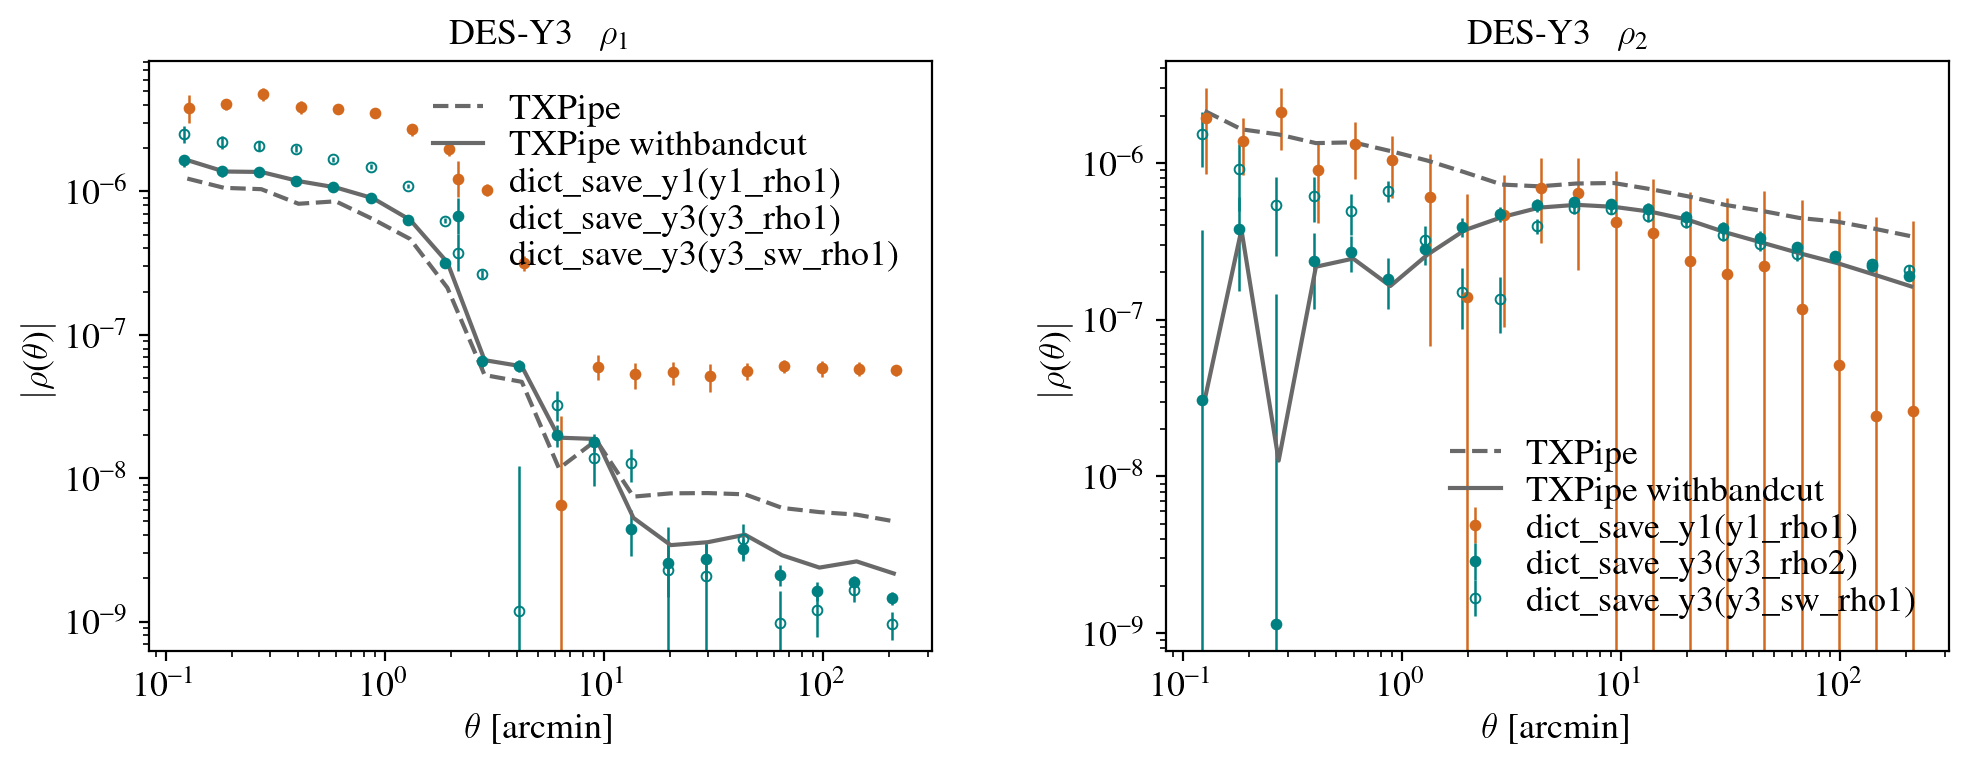

In [65]:
# Plot and also compare with Marco's plot
import pickle

def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')
            
plt.clf()
fig = plt.figure(figsize=(10,3.6))
gs  = gridspec.GridSpec(1, 2,
                       #height_ratios=[4,1],
                       top=0.97,
                       bottom=0.15,
                       hspace=0.15,
                       wspace=0.3,
                       right=0.98,
                       left=0.08
                       )


# Correlations computed in previous cells
corr1 = treecorr.GGCorrelation(nbins=20, min_sep=0.1,max_sep=250.0, sep_units="arcmin", bin_slop=0)
corr1.read(dir_output+'desy3_rho1.fits')
corr2 = treecorr.GGCorrelation(nbins=20, min_sep=0.1,max_sep=250.0, sep_units="arcmin", bin_slop=0)
corr2.read(dir_output+'desy3_rho2.fits')

corr1bc = treecorr.GGCorrelation(nbins=20, min_sep=0.1,max_sep=250.0, sep_units="arcmin", bin_slop=0)
corr1bc.read(dir_output+'desy3_rho1_withbandcut.fits')
corr2bc = treecorr.GGCorrelation(nbins=20, min_sep=0.1,max_sep=250.0, sep_units="arcmin", bin_slop=0)
corr2bc.read(dir_output+'desy3_rho2_withbandcut.fits')


# Correlations computed by Marco 
dict_save_y3 = load_obj('rhostat_gatti2021/everything_you_need_for_ABE')
dict_save_y1 = load_obj('rhostat_gatti2021/everything_you_need_for_ABE_old')

#--------------------------------------------------------------------

ax0 = plt.subplot(gs[0])
# Gatti2021 Y1
dv  = dict_save_y1['y1_rho1']
ax0.errorbar(10**(np.log10(dv[0])+0.02),np.abs(dv[1]),dv[2],color='chocolate', label = 'dict\_save\_y1(y1\_rho1)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5)
#dv  = dict_save_y1['y1_sw_rho1']
#ax0.errorbar(10**(np.log10(dv[0])+0.02),np.abs(dv[1]),dv[2],color='chocolate', label = 'dict\_save\_y1(y1_sw\_rho1)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5,mfc='None')

# Gatti2021 Y3
dv  = dict_save_y3['y3_rho1']
ax0.errorbar(dv[0],np.abs(dv[1]),np.abs(dv[2]),color='teal', label = 'dict\_save\_y3(y3\_rho1)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5)
dv  = dict_save_y3['y3_sw_rho1']
ax0.errorbar(dv[0],np.abs(dv[1]),np.abs(dv[2]),color='teal', label = 'dict\_save\_y3(y3\_sw\_rho1)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5,mfc='None')

ax0.loglog(np.exp(corr1.meanlogr), np.abs(corr1.xip), label='TXPipe',ls='--',color='dimgray')
ax0.loglog(np.exp(corr1bc.meanlogr), np.abs(corr1bc.xip), label='TXPipe withbandcut',color='dimgray')

ax0.set_ylabel(r'$|\rho(\theta)|$')
ax0.set_xlabel(r'$\theta\ [{\rm arcmin}]$')
ax0.set_title(r'DES-Y3\ \ \ $\rho_{1}$',size=13)
ax0.legend()

#--------------------------------------------------------------------
ax1 = plt.subplot(gs[1])

# Gatti2021 Y1
dv  = dict_save_y1['y1_rho2']
ax1.errorbar(10**(np.log10(dv[0])+0.02),np.abs(dv[1]),dv[2],color='chocolate', label = 'dict\_save\_y1(y1\_rho1)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5)
# Gatti2021 Y3
dv  = dict_save_y3['y3_rho2']
ax1.errorbar(dv[0],np.abs(dv[1]),dv[2],color='teal', label = 'dict\_save\_y3(y3\_rho2)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5)
dv  = dict_save_y3['y3_sw_rho2']
ax1.errorbar(dv[0],np.abs(dv[1]),np.abs(dv[2]),color='teal', label = 'dict\_save\_y3(y3\_sw\_rho1)' ,ls='None', marker='o',elinewidth=0.9,ms=3.5,mfc='None')

ax1.loglog(np.exp(corr2.meanlogr)  , np.abs(corr2.xip), label='TXPipe',ls='--',color='dimgray')
ax1.loglog(np.exp(corr2bc.meanlogr),np.abs( corr2bc.xip), label='TXPipe withbandcut',color='dimgray')

ax1.set_ylabel(r'$|\rho(\theta)|$')
ax1.set_xlabel(r'$\theta\ [{\rm arcmin}]$')
ax1.set_title(r'DES-Y3\ \ \ $\rho_{2}$',size=13)
ax1.legend()

plt.show()